<a href="https://colab.research.google.com/github/EliasHaddad00/Predicting-Medical-Costs/blob/master/ejh9qz_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
PATH_URL = "https://raw.githubusercontent.com/EliasHaddad00/Predicting-Medical-Costs/master/insurance.csv"

#get the data
data = pd.read_csv(PATH_URL)

In [ ]:
data.info()
#It says it uses 73.3+ KB of memory but it only uses 56 KB on my local storage.
#This dataset has 1338 entries
#This dataset has 7 features
#This dataset contains three catagorical features: smoker, region, and sex.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows
#there are no records with missing values

,age,sex,bmi,children,smoker,region,charges


In [ ]:
#Basic Statistics
data.describe()
#With describe we can see the mean, min, max and so on of every feature.
#can we find out more? YES!

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Lets find out how these mean apply to different areas
data.groupby("region").mean()
#We can see that all Regions have a similar mean concerning numerical features.

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING 

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

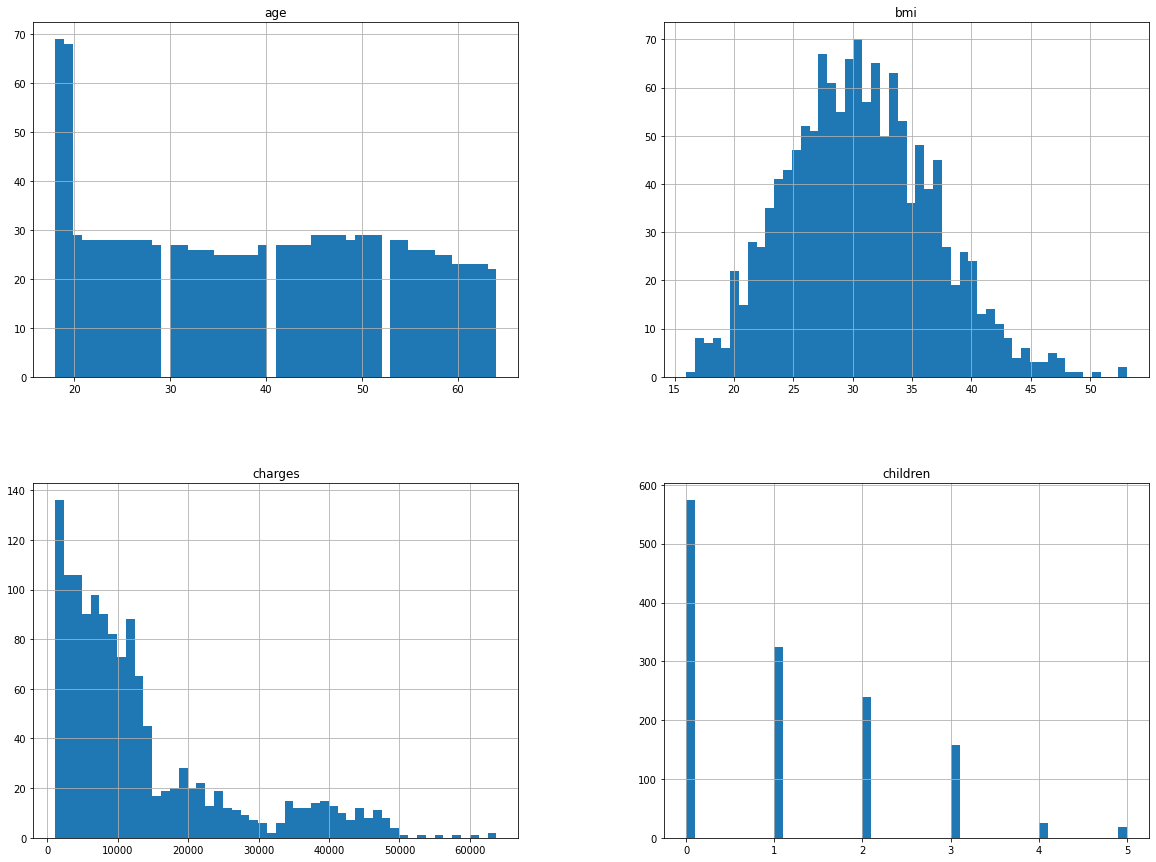

In [8]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.

%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()
#We can visulize the features so we can see how their values are distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9074ed0748>,
      dtype=object)

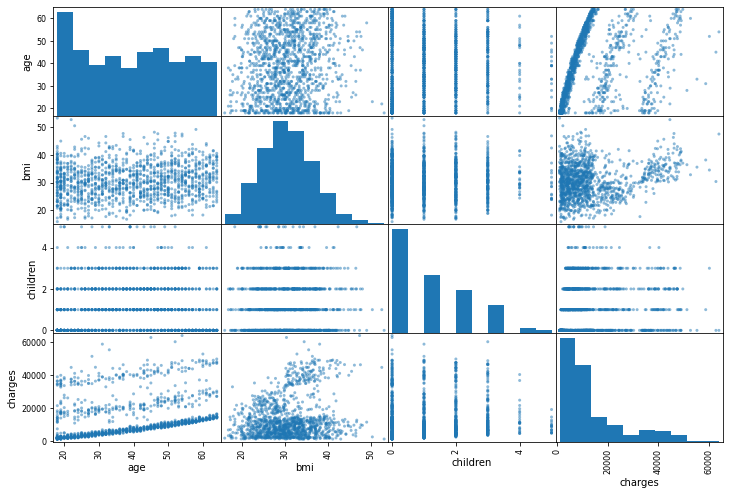

In [10]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["age", "bmi", "children",
              "charges"]
scatter_matrix(data[attributes], figsize=(12, 8))
# We can see how the feautures are collate with one another. 
#Since there are 4 numerical features, their will be 4^2 graphs.

(0.0, 60.0, 0.0, 70000.0)

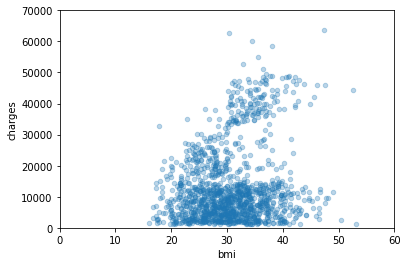

In [21]:
data.plot(kind="scatter", x="bmi", y="charges",
             alpha=0.3)
plt.axis([0, 60, 0, 70000])
#We can see even though intuitively we think that charges increase with bmi, but that is not the case in our dataset
#50+ bmi has two data points below $10000, and only one about $45000

In [23]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [29]:
# This is where we declare "charges" as a label
X_train = train_set.drop("charges", axis=1)
y_train = train_set["charges"].copy()

# we use this for testing
X_test = test_set.drop("charges", axis=1)
y_test = test_set["charges"].copy()
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [30]:
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
num_attribs = ["age", "bmi", "children"]#number features
cat_attribs = ["sex", "smoker", "region"]#catagory features
#using OneHotEncoder() to represent catagorical values as numbers instead.
#This can mean all "southwest" values become "2" 
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
#full pipelining
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.fit_transform(X_test)

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT 
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [53]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = 0.0; # parameter vector;
    self.alpha = 0.5; # learning rate
    self.cost  = []; # cost function

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT: 
    theta: updated value for theta
    cost: value of the cost function
    """
    # implementation code here
    X = np.concatenate([np.ones((len(X_train), 1)), X_train], axis=1)
    transpose = X.transpose()
    costs = []
    weights = np.zeros(X.shape[1], dtype=int)
    
    for i in range(iters): 
      h = np.dot(X, weights)
      c = h - y_train 
      g = np.dot(transpose, c)
      g = g / len(y_train)
      weights = weights - alpha*g

      current_cost = np.absolute(c).sum()
      costs.append(current_cost)
      
    return weights, costs

  def fitUsingGradientDescent(self, X_train, y_train):
    """
    Train the regressor using gradient descent
    """
    # implementation code here
    t = np.zeros((X_train.shape[1]+1,1))
    self.theta, self.cost = self.gradientDescent(X_train,y_train,t,self.alpha, 1000)

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    # implementation code here for Task 4.
    X = np.concatenate([np.ones((len(X_train), 1)), X_train], axis=1)
    transpose_x = X.transpose()
    optimal_theta = np.dot(np.linalg.inv(np.dot(transpose_x, X)), np.dot(transpose_x, y_train))
    self.theta = optimal_theta
    
    return self

  def predict(self, X_test):
    """
    Predicting the label
    """
    # implementation code here 
    X_test_b = np.c_[np.ones((len(X_test),1)), X_test]
    y_predict = X_test_b.dot(self.theta)
    return y_predict


  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    # implement here to return("Parameter vector is %f" % self.theta)   }
    return("Parameter vector is %f" % self.theta)
    
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)    

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

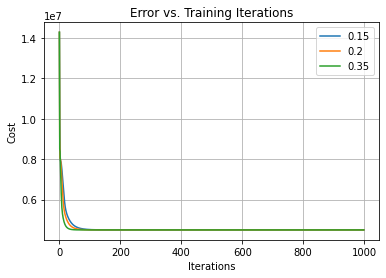

In [54]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.
#
# plt.set_xlabel('Iterations')  
# plt.set_ylabel('Cost')  
# plt.set_title('Error vs. Training Iterations')  

learning_rates = [0.15, 0.2, 0.35]

for lr in learning_rates:
    myGradientDescentModel_new = MyLinearRegression()
    myGradientDescentModel_new.alpha = lr
    myGradientDescentModel_new.fitUsingGradientDescent(X_train, y_train)
    plt.plot(myGradientDescentModel_new.cost)

plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations') 
plt.legend(list(map(str, learning_rates)))
plt.grid()

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [55]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS 

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [56]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)

# myGradientDescentModel_rmse  
y_gradient_predict = myGradientDescentModel.predict(X_test)
gradient_mse = mean_squared_error(y_test, y_gradient_predict)
myGradientDescentModel_rmse = np.sqrt(gradient_mse)
print(myGradientDescentModel_rmse)

# myNormalEquationModel_rmse 
y_normal_predict = myNormalEquationModel.predict(X_test)
normal_mse = mean_squared_error(y_test, y_normal_predict)
myNormalEquationModel_rmse = np.sqrt(normal_mse)
print(myNormalEquationModel_rmse)

5801.324436090285
5795.332533018759
10617.98726540688


- - -
## Task 6. PRESENT YOUR SOLUTION 

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

In [ ]:
# Your paragraph goes here for this section


**How can you pitch your solution to this project?**

I would present my solution by first presenting the problem of risk. The risk of not knowing how much insurance to provide to a patient can cost us millions of dollars. Then I would present this program that uses gradient descent to find the best theta, making our mean sqaure error low.

**What did you learn so far about the problem?**

None of the features given in the data set had a strong direct correlation with the cost. So even though we can get a good prediction of the cost, it is limited to the type data we used.

**Is there any insight moving forward to improve the solution.**

Getting more data to train the data would be reall helpful to get better prediction. Perhaps new features such as the type of operation/ visit took place. And what organ/body part was the center of question.


- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!